In [21]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
Data = pd.DataFrame.from_csv("https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv")

In [3]:
Data.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4    ...      \
date                                                           ...       
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667    ...       
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500    ...       
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000    ...       
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.723333    ...       
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000    ...       

                            T9   RH_9     T_out  Press_mm_hg  RH_out  \
date                                                                   
2016-01-11 17:00:00  17.033333  45.53  6.600000        733.5    92.0   
2016-01-11 17:10:00  17.066667  45.56  6.483333        733.6    92.0   
2016-01-11 17:20:00  17.000000  45.50  6.366667        733.7    92.0   
2016-01-11 17:30:00  17.000000  45.40  6.250000        733.8    92.0   
2016-01-11 17:40:00  17.000000  45.40  6.133333        733.9    92.0   

                     Windspeed  Visibility  Tdewpoint        rv1        rv2  
date                                                                         
2016-01-11 17:00:00   7.000000   63.000000        5.3  13.275433  13.275433  
2016-01-11 17:10:00   6.666667   59.166667        5.2  18.606195  18.606195  
2016-01-11 17:20:00   6.333333   55.333333        5.1  28.642668  28.642668  
2016-01-11 17:30:00   6.000000   51.500000        5.0  45.410389  45.410389  
2016-01-11 17:40:00   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [8]:
Data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.411665    755.522602   
std        ...           2.014712      4.151497      5.317409      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.666667    750.933333   
50%        ...          19.390000     40.900000      6.916667    756.100000   
75%        ...          20.600000     44.338095     10.408333    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [105]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non

In [4]:
Data.shape

(19735, 28)

In [5]:
Data.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

date
2016-01-31     97.026010
2016-02-29    100.945881
2016-03-31     96.953405
2016-04-30     98.888889
2016-05-31     94.199325
Freq: M, Name: Appliances, dtype: float64

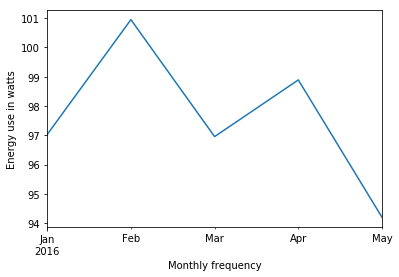

In [11]:
Data.Appliances.resample('M').mean().plot()
plt.xlabel('Monthly frequency')
plt.ylabel('Energy use in watts')
Data.Appliances.resample('M').mean()

In [6]:
Data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [12]:
Data.rename(columns={'T1': 'temp_kitchen', 'RH_1': 'hum_kitchen', 'T2': 'temp_living', 'RH_2': 'hum_living','T3': 'temp_laundry', 'RH_3': 'hum_laundry','T4': 'temp_office', 'RH_4': 'hum_office','T5': 'temp_bathroom', 'RH_5': 'hum_bathroom','T6': 'temp_building_out', 'RH_6': 'hum_building_out','T7': 'temp_ironing', 'RH_7': 'hum_ironing','T8': 'temp_teenRoom', 'RH_8': 'hum_teenRoom','T9': 'temp_parentRoom', 'RH_9': 'hum_parentRoom', 'T_out': 'temp_out', 'RH_out': 'hum_out', 'Press_mm_hg': 'Pressure' }, inplace=True)

In [13]:
Data.columns

Index(['Appliances', 'lights', 'temp_kitchen', 'hum_kitchen', 'temp_living',
       'hum_living', 'temp_laundry', 'hum_laundry', 'temp_office',
       'hum_office', 'temp_bathroom', 'hum_bathroom', 'temp_building_out',
       'hum_building_out', 'temp_ironing', 'hum_ironing', 'temp_teenRoom',
       'hum_teenRoom', 'temp_parentRoom', 'hum_parentRoom', 'temp_out',
       'Pressure', 'hum_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [16]:
def seconds(x):
    sec = x.hour*3600+x.minute*60+x.second
    return sec
Data['Num_sec_midnight']=seconds(Data.index)
Data

Appliances  lights  temp_kitchen  hum_kitchen  \
date                                                                 
2016-01-11 17:00:00          60      30     19.890000    47.596667   
2016-01-11 17:10:00          60      30     19.890000    46.693333   
2016-01-11 17:20:00          50      30     19.890000    46.300000   
2016-01-11 17:30:00          50      40     19.890000    46.066667   
2016-01-11 17:40:00          60      40     19.890000    46.333333   
2016-01-11 17:50:00          50      40     19.890000    46.026667   
2016-01-11 18:00:00          60      50     19.890000    45.766667   
2016-01-11 18:10:00          60      50     19.856667    45.560000   
2016-01-11 18:20:00          60      40     19.790000    45.597500   
2016-01-11 18:30:00          70      40     19.856667    46.090000   
2016-01-11 18:40:00         230      70     19.926667    45.863333   
2016-01-11 18:50:00         580      60     20.066667    46.396667   
2016-01-11 19:00:00         430      50     20.133333    48.000000   
2016-01-11 19:10:00         250      40     20.260000    52.726667   
2016-01-11 19:20:00         100      10     20.426667    55.893333   
2016-01-11 19:30:00         100      10     20.566667    53.893333   
2016-01-11 19:40:00          90      10     20.730000    52.660000   
2016-01-11 19:50:00          70      30     20.856667    53.660000   
2016-01-11 20:00:00          80      30     20.890000    51.193333   
2016-01-11 20:10:00         140      40     20.890000    49.800000   
2016-01-11 20:20:00         120      20     20.890000    48.433333   
2016-01-11 20:30:00         190      40     20.963333    47.633333   
2016-01-11 20:40:00         110      40     21.033333    47.063333   
2016-01-11 20:50:00         110      40     21.100000    46.596667   
2016-01-11 21:00:00         110      30     21.133333    46.060000   
2016-01-11 21:10:00         110      20     21.200000    45.800000   
2016-01-11 21:20:00         100      30     21.290000    45.900000   
2016-01-11 21:30:00         100      20     21.356667    45.826667   
2016-01-11 21:40:00         100      20     21.390000    45.690000   
2016-01-11 21:50:00         100      20     21.500000    45.333333   
...                         ...     ...           ...          ...   
2016-05-27 13:10:00         280       0     25.033333    48.363333   
2016-05-27 13:20:00         240       0     25.166667    48.156667   
2016-05-27 13:30:00         250       0     25.323333    47.930000   
2016-05-27 13:40:00         220       0     25.390000    47.656667   
2016-05-27 13:50:00         230       0     25.500000    47.133333   
2016-05-27 14:00:00         190      10     25.500000    47.060000   
2016-05-27 14:10:00         160       0     25.600000    46.990000   
2016-05-27 14:20:00          80       0     25.600000    46.730000   
2016-05-27 14:30:00          60       0     25.566667    46.633333   
2016-05-27 14:40:00          60       0     25.500000    46.360000   
2016-05-27 14:50:00          60       0     25.500000    46.060000   
2016-05-27 15:00:00          60       0     25.500000    45.933333   
2016-05-27 15:10:00          70       0     25.500000    45.760000   
2016-05-27 15:20:00          80       0     25.500000    45.626667   
2016-05-27 15:30:00          80       0     25.500000    45.590000   
2016-05-27 15:40:00          70       0     25.500000    45.522500   
2016-05-27 15:50:00         100       0     25.500000    45.633333   
2016-05-27 16:00:00         100       0     25.500000    45.730000   
2016-05-27 16:10:00          90       0     25.500000    45.790000   
2016-05-27 16:20:00         100       0     25.500000    45.933333   
2016-05-27 16:30:00         220       0     25.426667    46.060000   
2016-05-27 16:40:00         180       0     25.500000    46.530000   
2016-05-27 16:50:00         120       0     25.500000    47.456667   
2016-05-27 17:00:00         110       0     25.600000    47.193333   
2016-05-27 17:10:00          90

In [17]:
def day_week(z):
    a=[]
    for y in z:
        if y == 0:
            a.append('Monday')
        elif y == 1:
            a.append('Tuesday')
        elif y == 2:
            a.append('Wednesday')
        elif y == 3:
            a.append('Thrusday')
        elif y == 4:
            a.append('Friday')
        elif y == 5:
            a.append('Saturday')
        elif y == 6:
            a.append('Sunday')
    return a
z = Data.index.dayofweek
Data['Day_Status'] = z
Data['Day_Status'] = day_week(Data.Day_Status)
Data

Appliances  lights  temp_kitchen  hum_kitchen  \
date                                                                 
2016-01-11 17:00:00          60      30     19.890000    47.596667   
2016-01-11 17:10:00          60      30     19.890000    46.693333   
2016-01-11 17:20:00          50      30     19.890000    46.300000   
2016-01-11 17:30:00          50      40     19.890000    46.066667   
2016-01-11 17:40:00          60      40     19.890000    46.333333   
2016-01-11 17:50:00          50      40     19.890000    46.026667   
2016-01-11 18:00:00          60      50     19.890000    45.766667   
2016-01-11 18:10:00          60      50     19.856667    45.560000   
2016-01-11 18:20:00          60      40     19.790000    45.597500   
2016-01-11 18:30:00          70      40     19.856667    46.090000   
2016-01-11 18:40:00         230      70     19.926667    45.863333   
2016-01-11 18:50:00         580      60     20.066667    46.396667   
2016-01-11 19:00:00         430      50     20.133333    48.000000   
2016-01-11 19:10:00         250      40     20.260000    52.726667   
2016-01-11 19:20:00         100      10     20.426667    55.893333   
2016-01-11 19:30:00         100      10     20.566667    53.893333   
2016-01-11 19:40:00          90      10     20.730000    52.660000   
2016-01-11 19:50:00          70      30     20.856667    53.660000   
2016-01-11 20:00:00          80      30     20.890000    51.193333   
2016-01-11 20:10:00         140      40     20.890000    49.800000   
2016-01-11 20:20:00         120      20     20.890000    48.433333   
2016-01-11 20:30:00         190      40     20.963333    47.633333   
2016-01-11 20:40:00         110      40     21.033333    47.063333   
2016-01-11 20:50:00         110      40     21.100000    46.596667   
2016-01-11 21:00:00         110      30     21.133333    46.060000   
2016-01-11 21:10:00         110      20     21.200000    45.800000   
2016-01-11 21:20:00         100      30     21.290000    45.900000   
2016-01-11 21:30:00         100      20     21.356667    45.826667   
2016-01-11 21:40:00         100      20     21.390000    45.690000   
2016-01-11 21:50:00         100      20     21.500000    45.333333   
...                         ...     ...           ...          ...   
2016-05-27 13:10:00         280       0     25.033333    48.363333   
2016-05-27 13:20:00         240       0     25.166667    48.156667   
2016-05-27 13:30:00         250       0     25.323333    47.930000   
2016-05-27 13:40:00         220       0     25.390000    47.656667   
2016-05-27 13:50:00         230       0     25.500000    47.133333   
2016-05-27 14:00:00         190      10     25.500000    47.060000   
2016-05-27 14:10:00         160       0     25.600000    46.990000   
2016-05-27 14:20:00          80       0     25.600000    46.730000   
2016-05-27 14:30:00          60       0     25.566667    46.633333   
2016-05-27 14:40:00          60       0     25.500000    46.360000   
2016-05-27 14:50:00          60       0     25.500000    46.060000   
2016-05-27 15:00:00          60       0     25.500000    45.933333   
2016-05-27 15:10:00          70       0     25.500000    45.760000   
2016-05-27 15:20:00          80       0     25.500000    45.626667   
2016-05-27 15:30:00          80       0     25.500000    45.590000   
2016-05-27 15:40:00          70       0     25.500000    45.522500   
2016-05-27 15:50:00         100       0     25.500000    45.633333   
2016-05-27 16:00:00         100       0     25.500000    45.730000   
2016-05-27 16:10:00          90       0     25.500000    45.790000   
2016-05-27 16:20:00         100       0     25.500000    45.933333   
2016-05-27 16:30:00         220       0     25.426667    46.060000   
2016-05-27 16:40:00         180       0     25.500000    46.530000   
2016-05-27 16:50:00         120       0     25.500000    47.456667   
2016-05-27 17:00:00         110       0     25.600000    47.193333   
2016-05-27 17:10:00          90

In [19]:
def week (x):
    a=[]
    for y in x:
        if y == 'Saturday' or y == 'Sunday':
            a.append('weekend')
        else:
            a.append('weekday')
    return a
Data['week_status']= week(Data.Day_Status)
Data

Appliances  lights  temp_kitchen  hum_kitchen  \
date                                                                 
2016-01-11 17:00:00          60      30     19.890000    47.596667   
2016-01-11 17:10:00          60      30     19.890000    46.693333   
2016-01-11 17:20:00          50      30     19.890000    46.300000   
2016-01-11 17:30:00          50      40     19.890000    46.066667   
2016-01-11 17:40:00          60      40     19.890000    46.333333   
2016-01-11 17:50:00          50      40     19.890000    46.026667   
2016-01-11 18:00:00          60      50     19.890000    45.766667   
2016-01-11 18:10:00          60      50     19.856667    45.560000   
2016-01-11 18:20:00          60      40     19.790000    45.597500   
2016-01-11 18:30:00          70      40     19.856667    46.090000   
2016-01-11 18:40:00         230      70     19.926667    45.863333   
2016-01-11 18:50:00         580      60     20.066667    46.396667   
2016-01-11 19:00:00         430      50     20.133333    48.000000   
2016-01-11 19:10:00         250      40     20.260000    52.726667   
2016-01-11 19:20:00         100      10     20.426667    55.893333   
2016-01-11 19:30:00         100      10     20.566667    53.893333   
2016-01-11 19:40:00          90      10     20.730000    52.660000   
2016-01-11 19:50:00          70      30     20.856667    53.660000   
2016-01-11 20:00:00          80      30     20.890000    51.193333   
2016-01-11 20:10:00         140      40     20.890000    49.800000   
2016-01-11 20:20:00         120      20     20.890000    48.433333   
2016-01-11 20:30:00         190      40     20.963333    47.633333   
2016-01-11 20:40:00         110      40     21.033333    47.063333   
2016-01-11 20:50:00         110      40     21.100000    46.596667   
2016-01-11 21:00:00         110      30     21.133333    46.060000   
2016-01-11 21:10:00         110      20     21.200000    45.800000   
2016-01-11 21:20:00         100      30     21.290000    45.900000   
2016-01-11 21:30:00         100      20     21.356667    45.826667   
2016-01-11 21:40:00         100      20     21.390000    45.690000   
2016-01-11 21:50:00         100      20     21.500000    45.333333   
...                         ...     ...           ...          ...   
2016-05-27 13:10:00         280       0     25.033333    48.363333   
2016-05-27 13:20:00         240       0     25.166667    48.156667   
2016-05-27 13:30:00         250       0     25.323333    47.930000   
2016-05-27 13:40:00         220       0     25.390000    47.656667   
2016-05-27 13:50:00         230       0     25.500000    47.133333   
2016-05-27 14:00:00         190      10     25.500000    47.060000   
2016-05-27 14:10:00         160       0     25.600000    46.990000   
2016-05-27 14:20:00          80       0     25.600000    46.730000   
2016-05-27 14:30:00          60       0     25.566667    46.633333   
2016-05-27 14:40:00          60       0     25.500000    46.360000   
2016-05-27 14:50:00          60       0     25.500000    46.060000   
2016-05-27 15:00:00          60       0     25.500000    45.933333   
2016-05-27 15:10:00          70       0     25.500000    45.760000   
2016-05-27 15:20:00          80       0     25.500000    45.626667   
2016-05-27 15:30:00          80       0     25.500000    45.590000   
2016-05-27 15:40:00          70       0     25.500000    45.522500   
2016-05-27 15:50:00         100       0     25.500000    45.633333   
2016-05-27 16:00:00         100       0     25.500000    45.730000   
2016-05-27 16:10:00          90       0     25.500000    45.790000   
2016-05-27 16:20:00         100       0     25.500000    45.933333   
2016-05-27 16:30:00         220       0     25.426667    46.060000   
2016-05-27 16:40:00         180       0     25.500000    46.530000   
2016-05-27 16:50:00         120       0     25.500000    47.456667   
2016-05-27 17:00:00         110       0     25.600000    47.193333   
2016-05-27 17:10:00          90

C:\Users\gaurang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Energy use in watts')

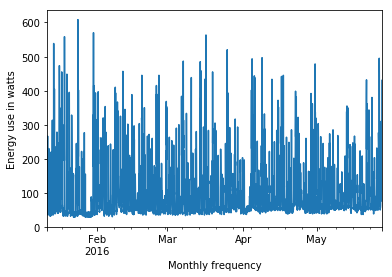

In [22]:
Data.Appliances.resample('H').plot()
rcParams['figure.figsize'] = 11.7,8.27
plt.xlabel('Monthly frequency')
plt.ylabel('Energy use in watts')

C:\Users\gaurang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  


Text(0,0.5,'Energy use in watts')

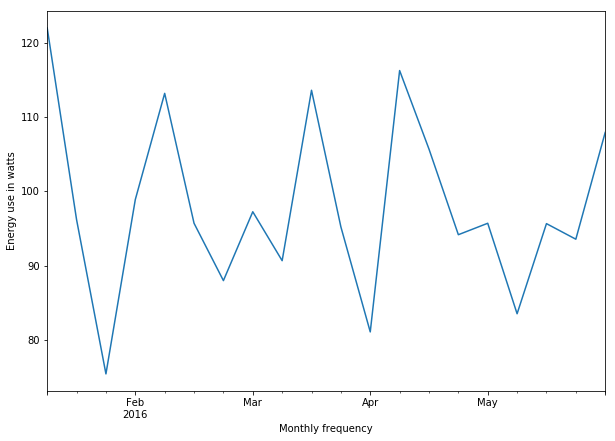

In [25]:
rcParams['figure.figsize'] = 10,7
Data.Appliances.resample('W').plot()
plt.xlabel('Monthly frequency')
plt.ylabel('Energy use in watts')


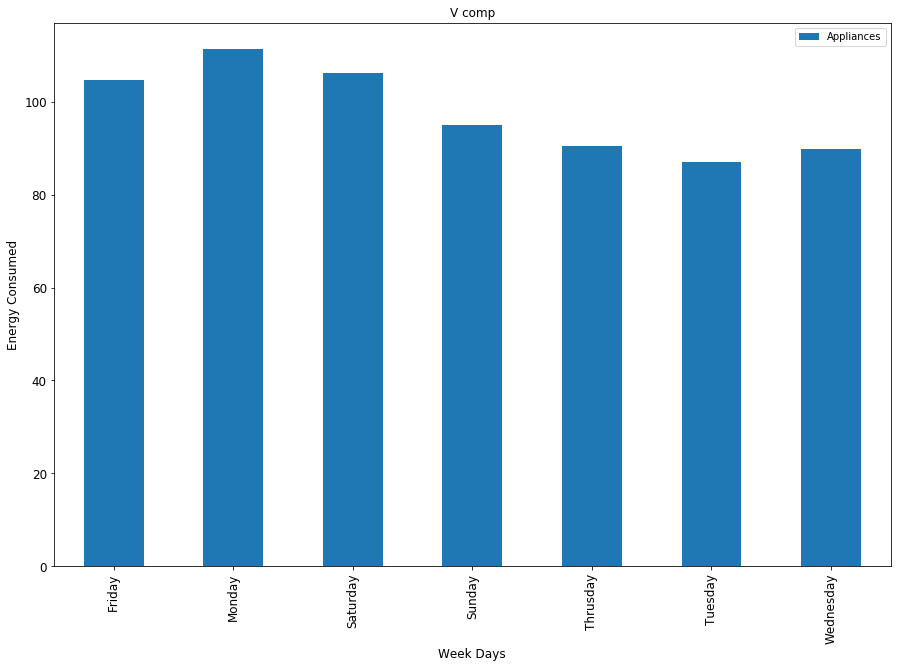

In [67]:
newData=Data.groupby(['Day_Status']).mean()
ax = newData[['Appliances']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Week Days", fontsize=12)
ax.set_ylabel("Energy Consumed", fontsize=12)
plt.show()

date
2016-01-17    121.953642
2016-01-24     96.190476
2016-01-31     75.456349
2016-02-07     98.888889
2016-02-14    113.164683
2016-02-21     95.704365
2016-02-28     87.996032
2016-03-06     97.251984
2016-03-13     90.674603
2016-03-20    113.581349
2016-03-27     95.218254
2016-04-03     81.101190
2016-04-10    116.230159
2016-04-17    105.674603
2016-04-24     94.166667
2016-05-01     95.704365
2016-05-08     83.541667
2016-05-15     95.654762
2016-05-22     93.561508
2016-05-29    107.912409
Freq: W-SUN, Name: Appliances, dtype: float64


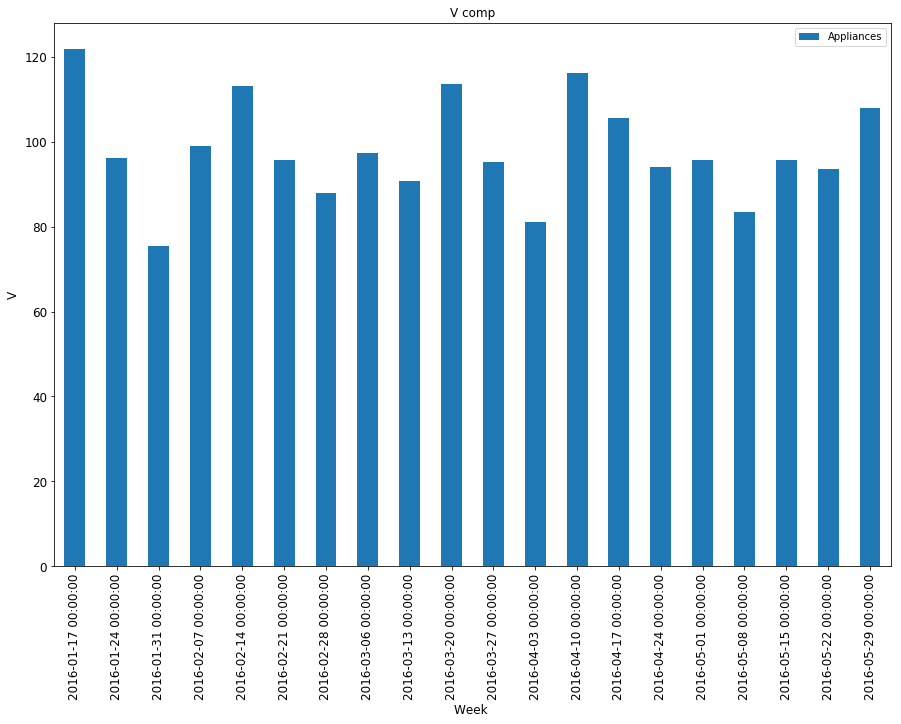

In [64]:
df5=Data.Appliances.resample('W').mean()
print(df5)
ax = df5.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Week ", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()

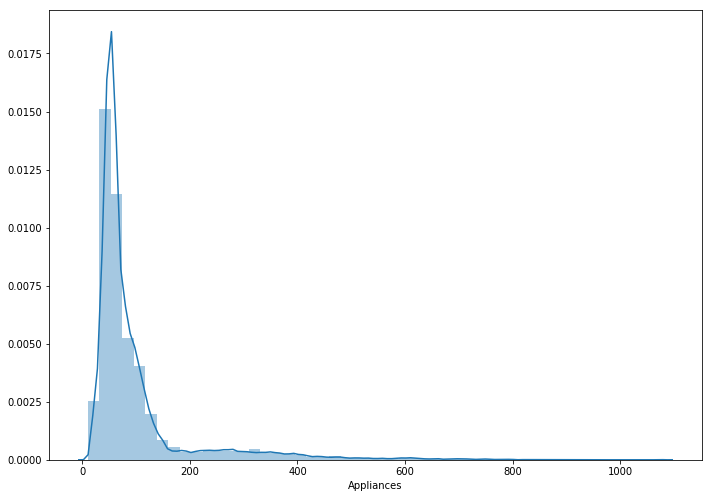

In [31]:
sns.distplot(Data["Appliances"])

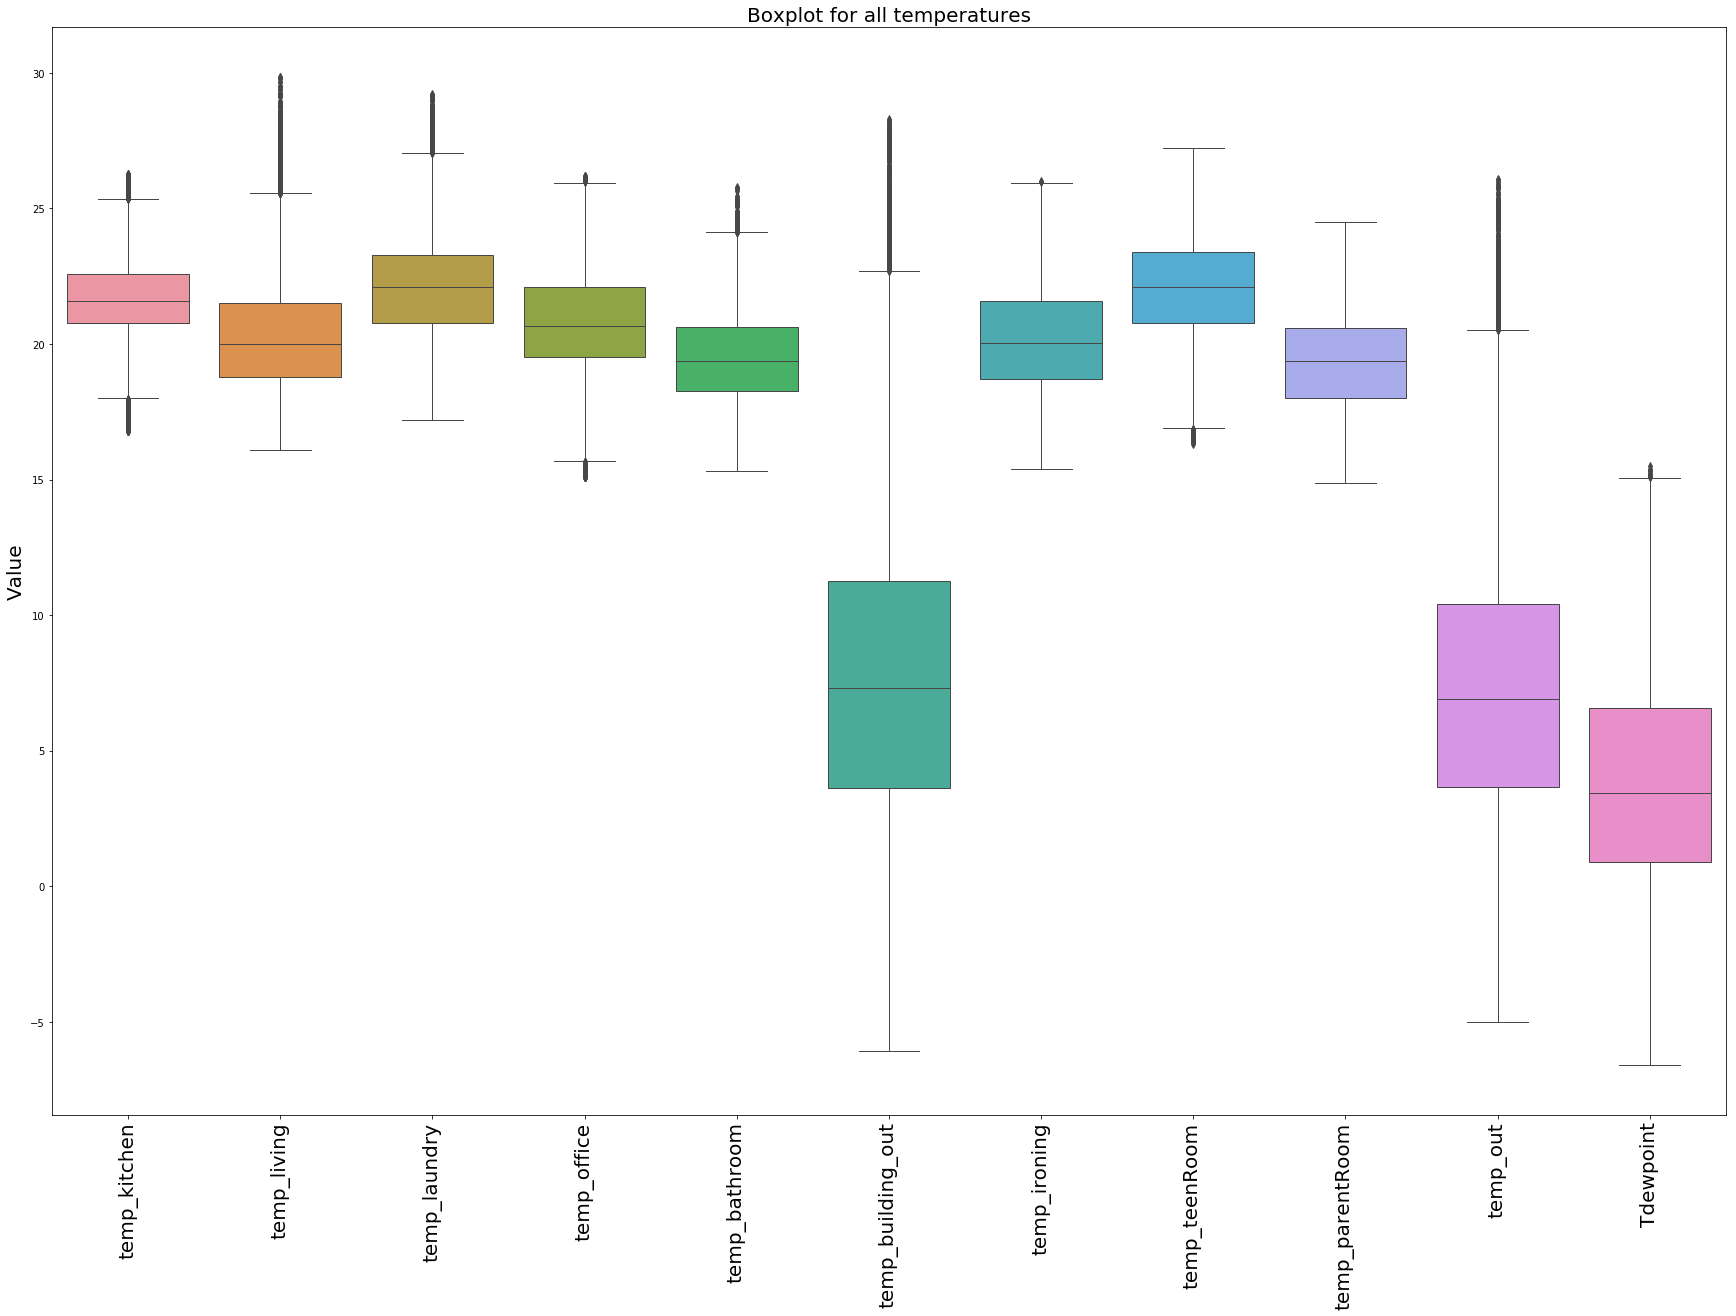

In [49]:
def doBoxplot(data, title):
    sns.mpl.rc('figure', figsize=(30,20))
    ax = sns.boxplot(data=data, linewidth=1)
    list = ax.set_xticklabels(labels = data.columns, rotation='vertical', fontdict={'fontsize':'20'})
    list = ax.set_title(title, fontdict={'fontsize':'20'})
    list = ax.set_ylabel('Value', fontdict={'fontsize':'20'})

boxdf = Data.loc[:,['temp_kitchen', 'temp_living','temp_laundry', 'temp_office', 'temp_bathroom', 'temp_building_out', 'temp_ironing', 'temp_teenRoom', 'temp_parentRoom', 'temp_out', 'Tdewpoint']]
box2df = Data.loc[:,['lights']]
box3df = Data.loc[:,['hum_kitchen', 'hum_living', 'hum_laundry', 'hum_office', 'hum_bathroom', 'hum_building_out', 'hum_ironing', 'hum_teenRoom', 'hum_parentRoom', 'hum_out']]
box6df = Data.loc[:,['Windspeed']]
box4df = Data.loc[:,['Visibility']]
box5df = Data.loc[:,['Appliances']]
doBoxplot(boxdf, 'Boxplot for all temperatures')

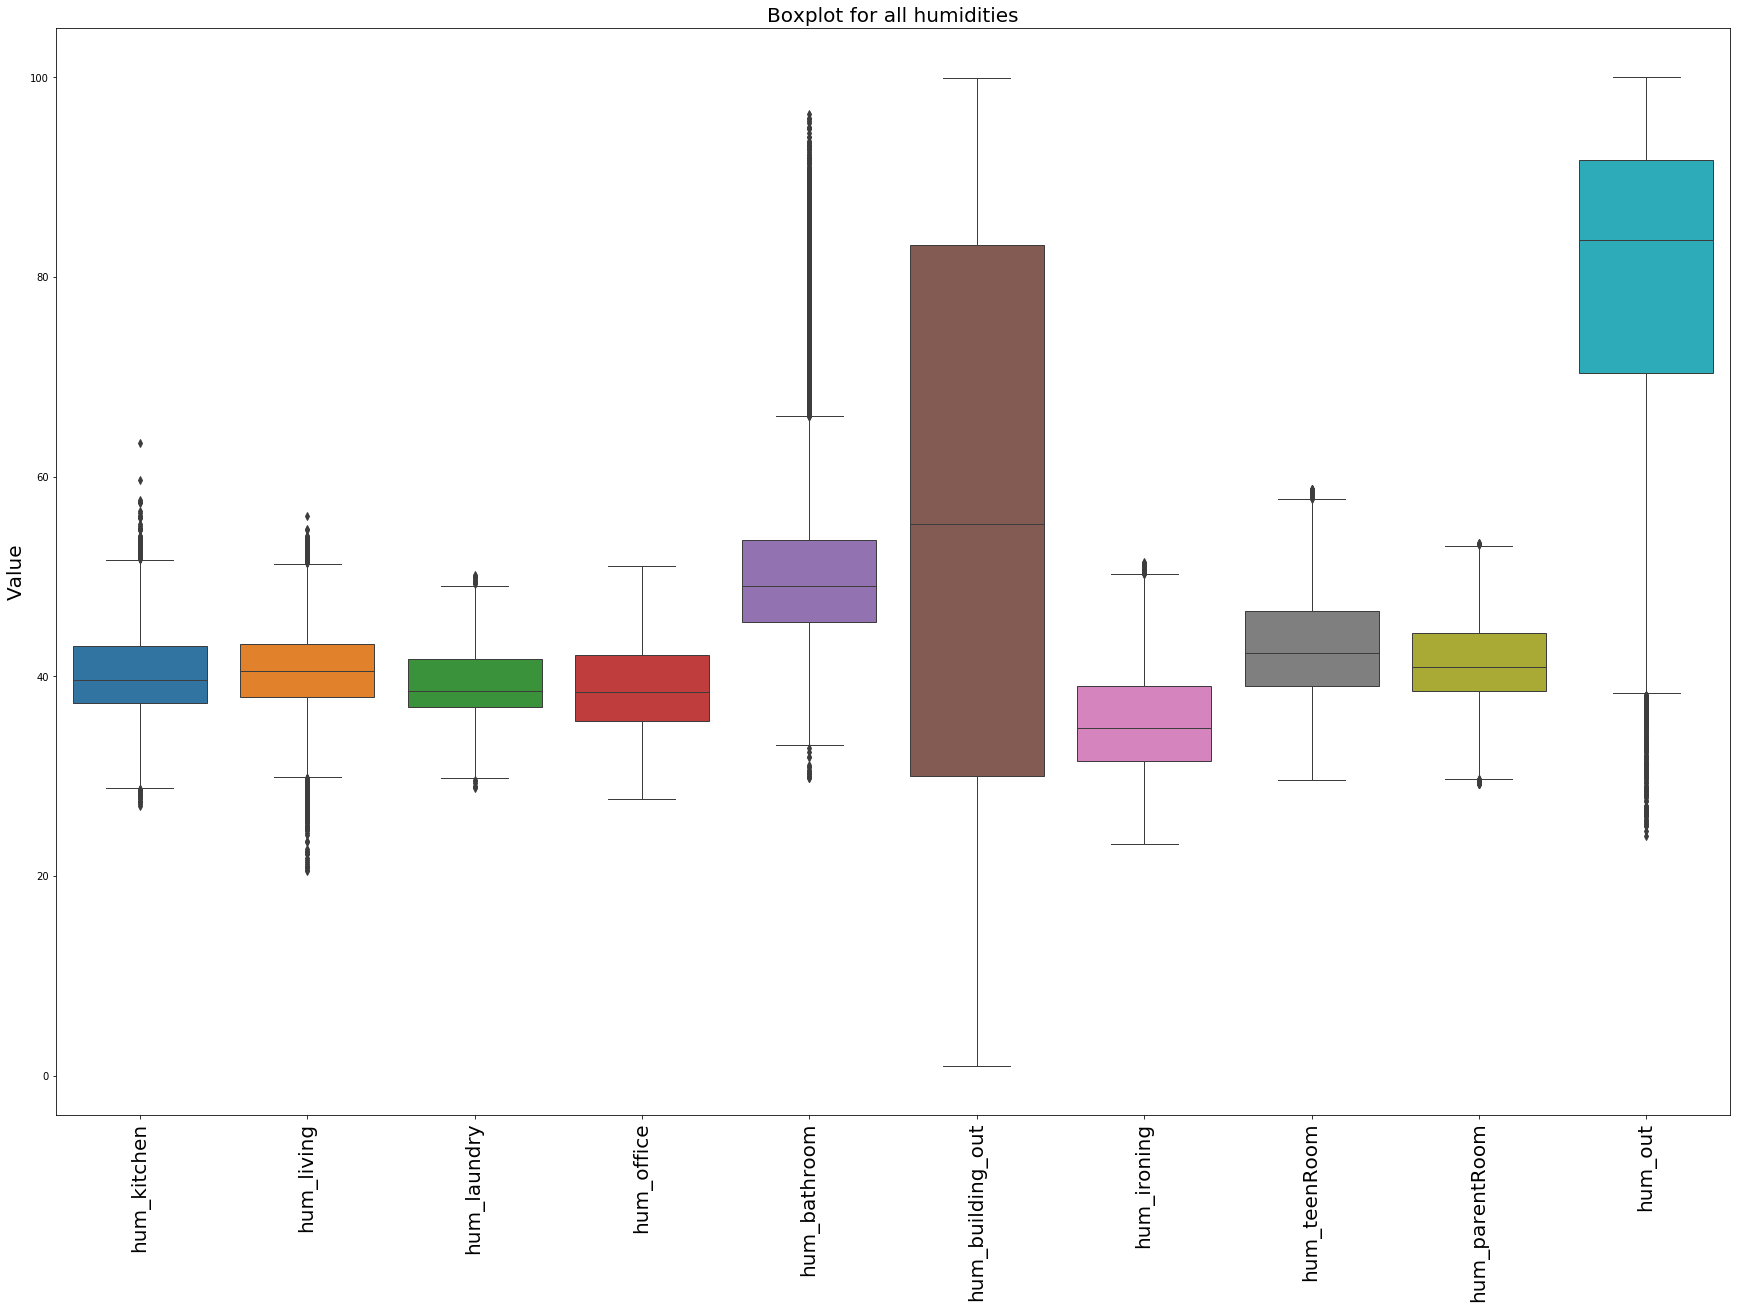

In [40]:
doBoxplot(box3df, 'Boxplot for all humidities')

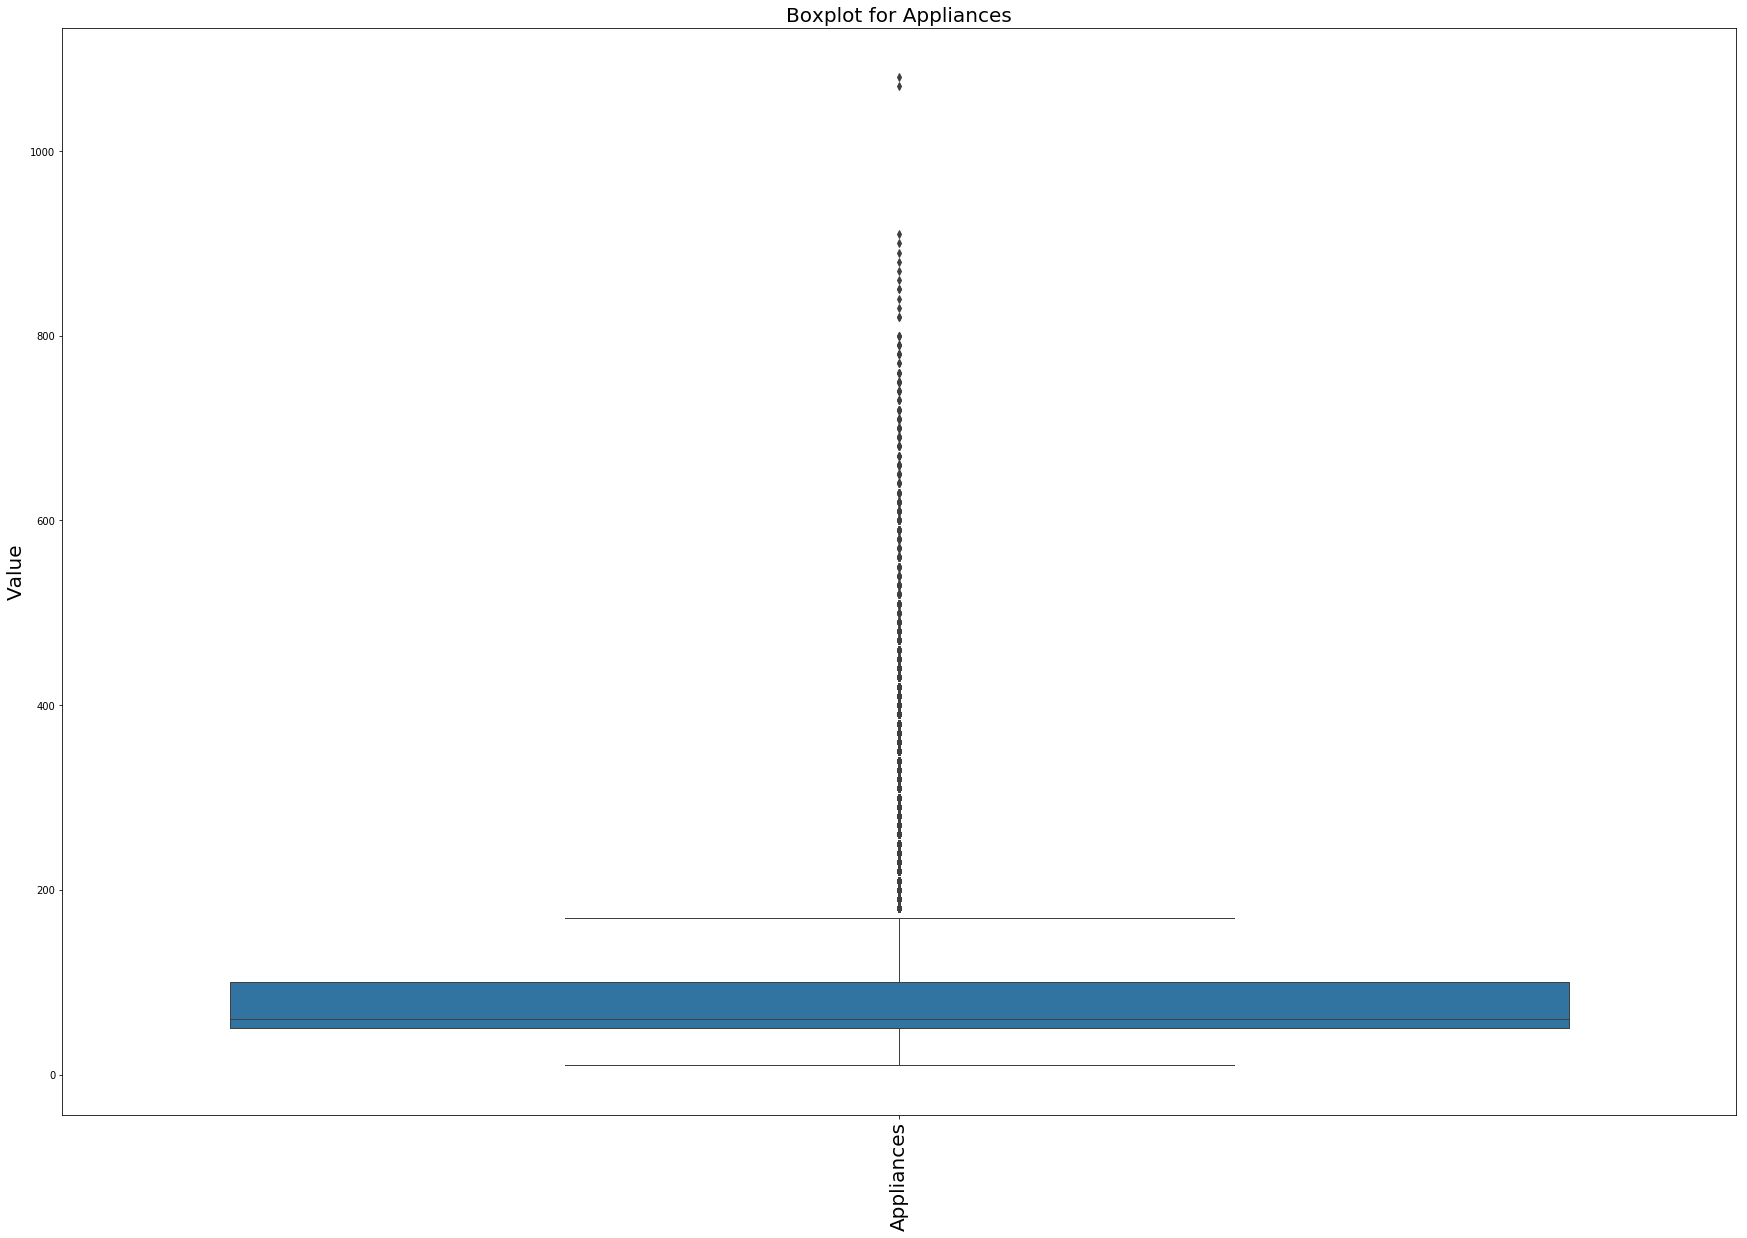

In [41]:
doBoxplot(box5df, 'Boxplot for Appliances')

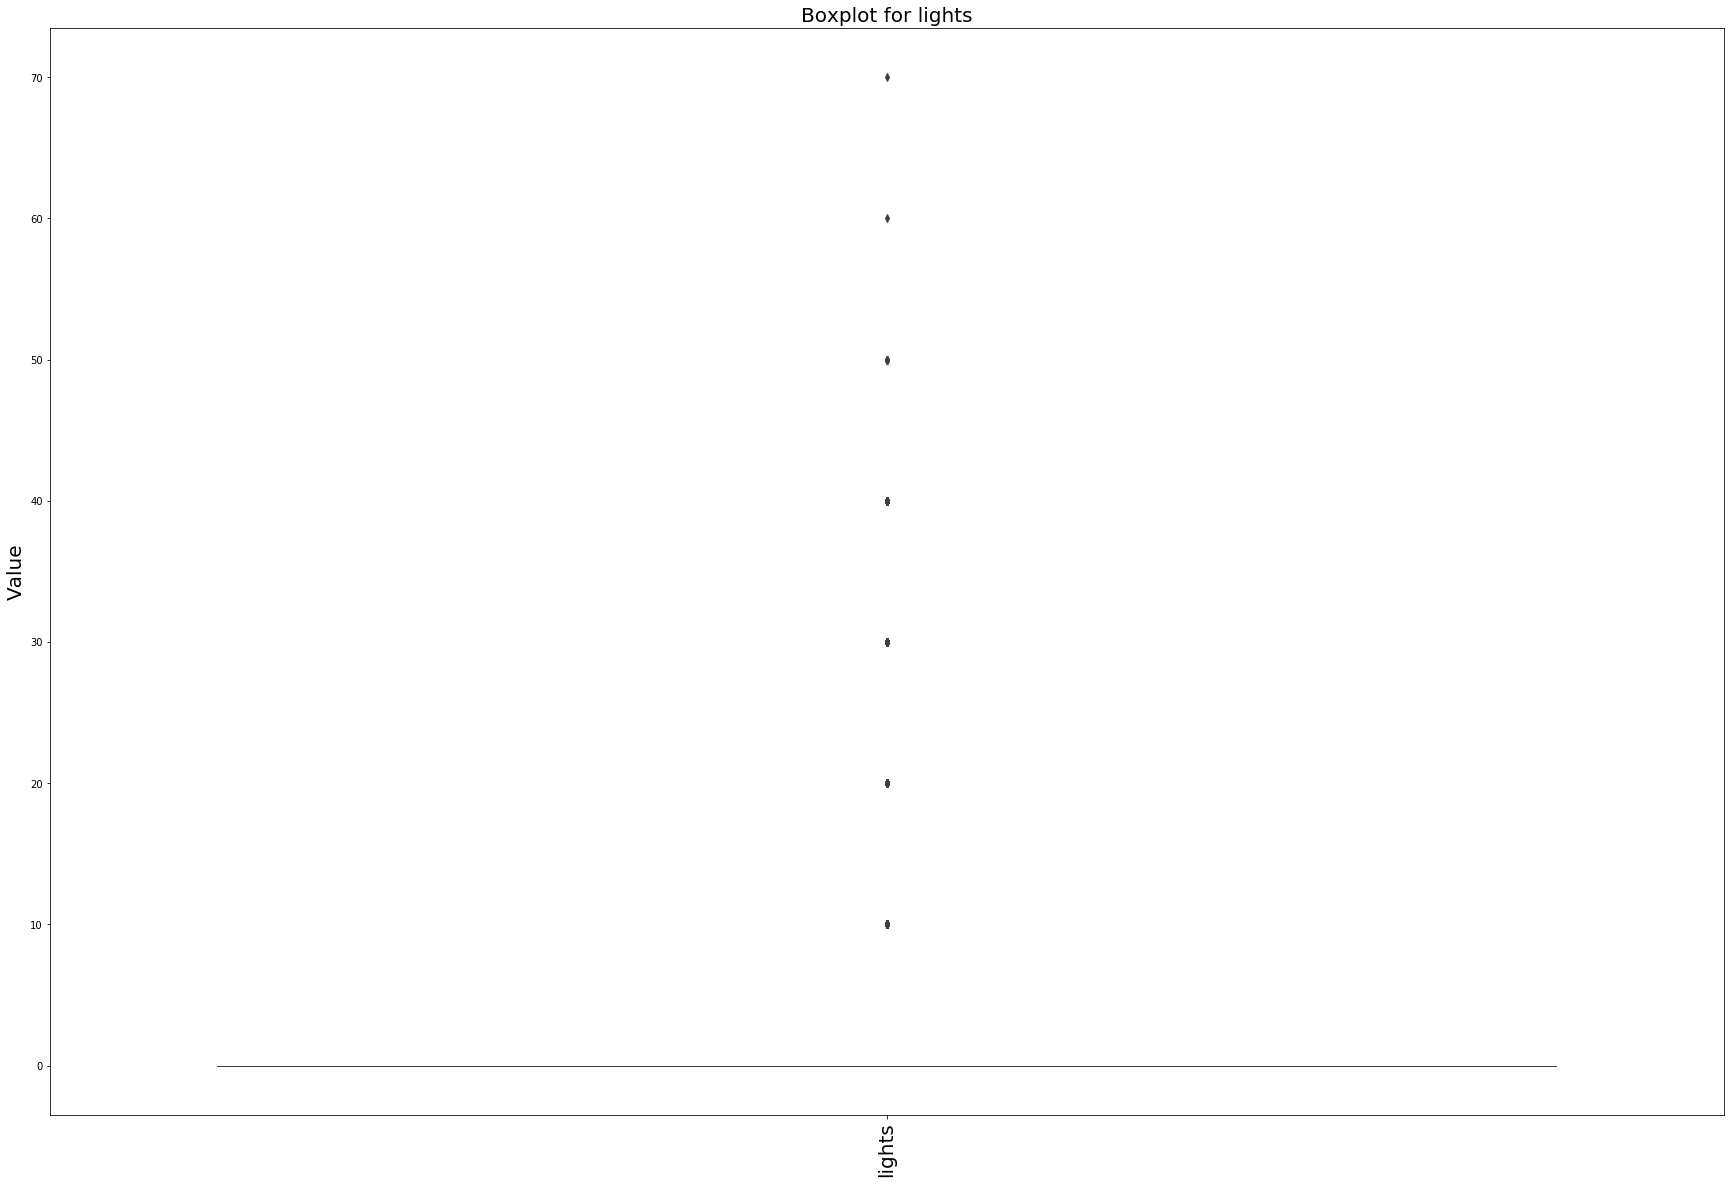

In [43]:
doBoxplot(box2df, 'Boxplot for lights')

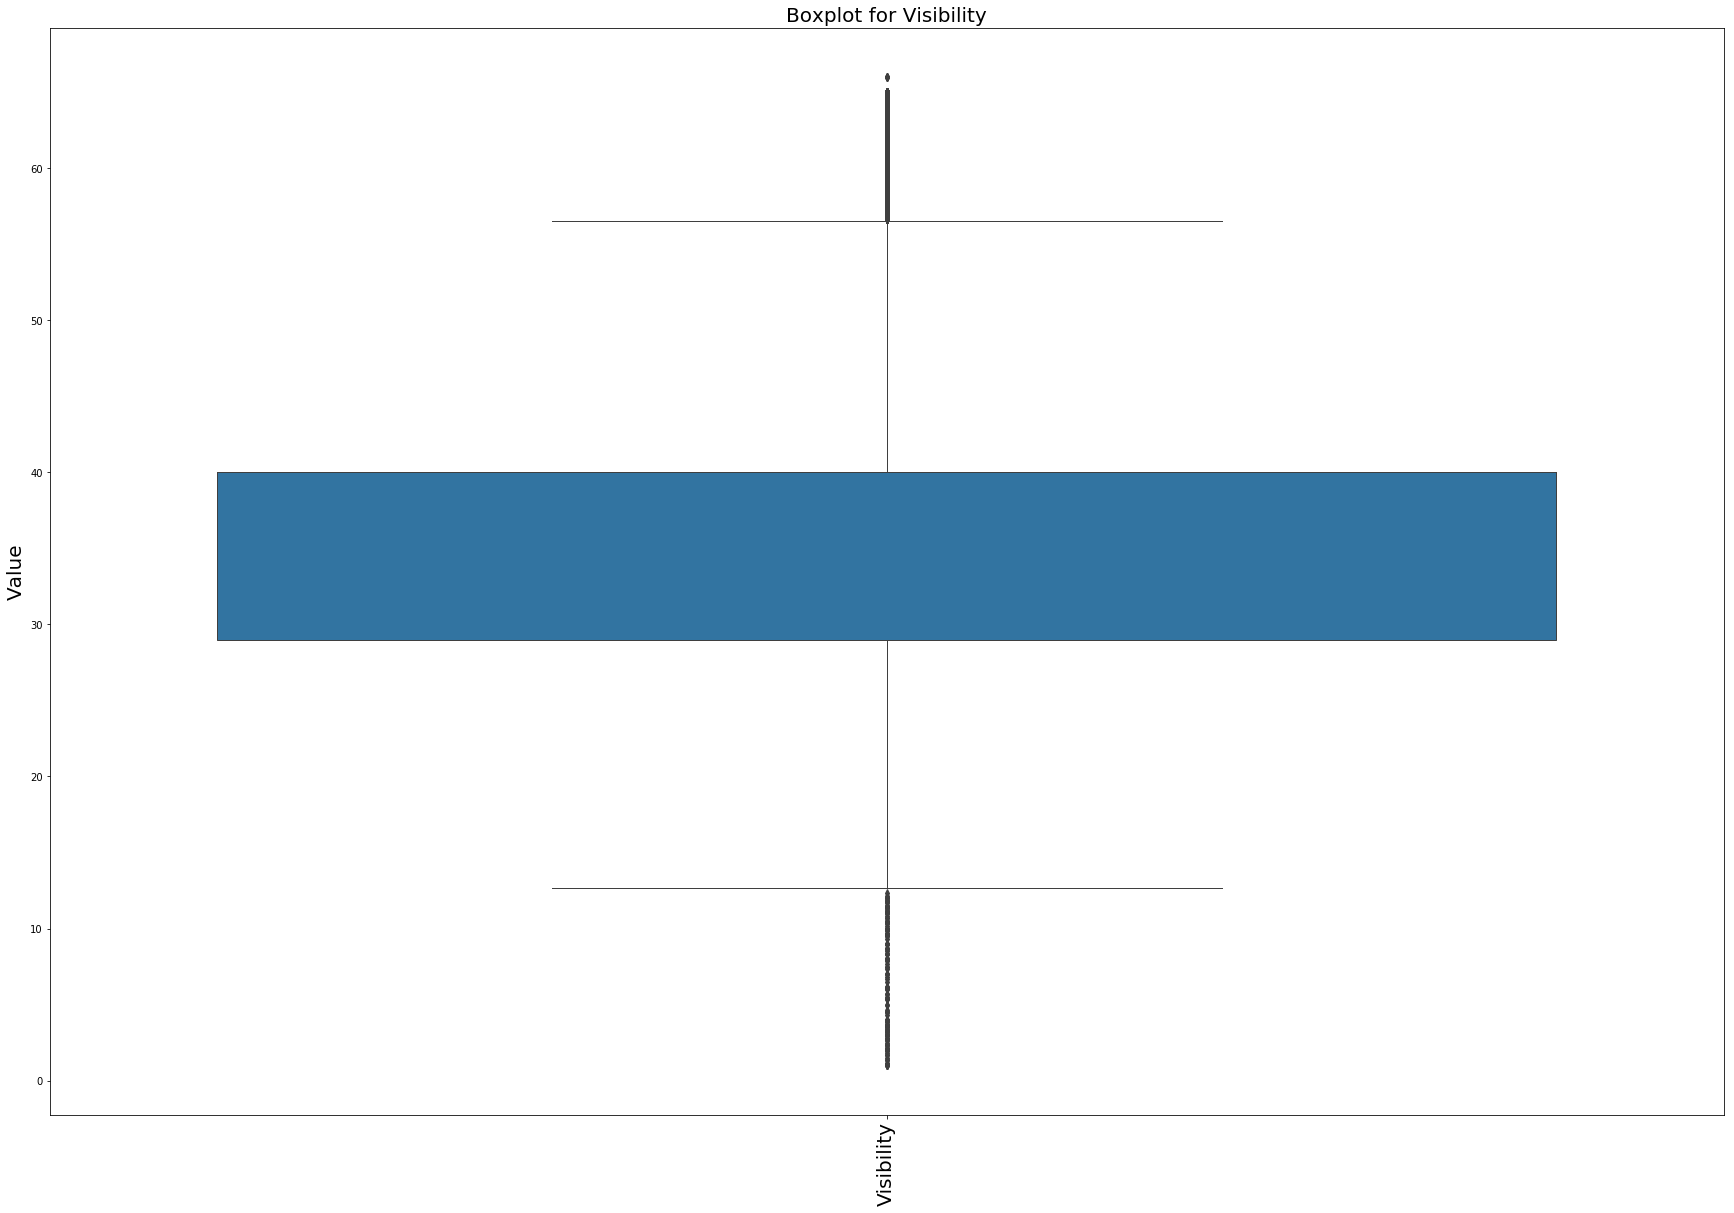

In [50]:
doBoxplot(box4df, 'Boxplot for Visibility')

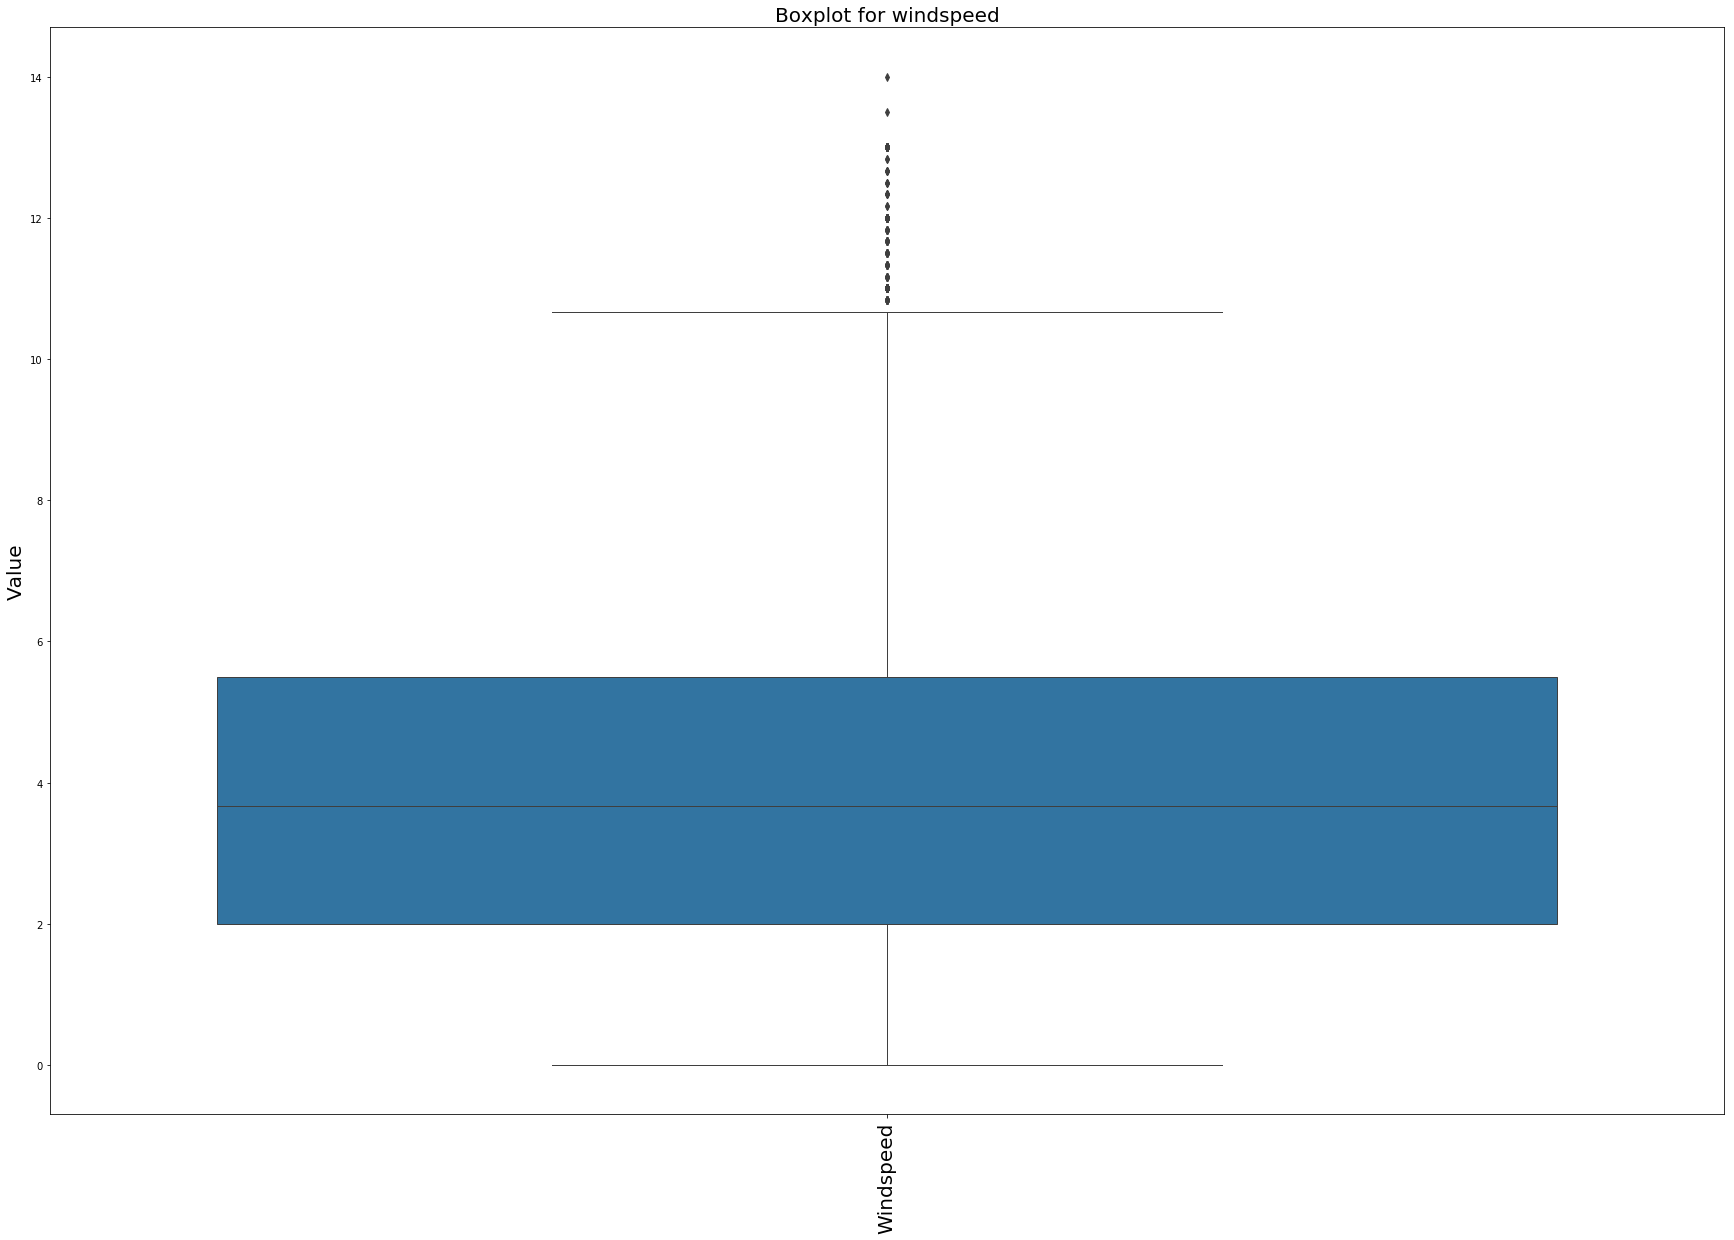

In [52]:
doBoxplot(box6df, 'Boxplot for windspeed')

In [54]:
Data.columns

Index(['Appliances', 'lights', 'temp_kitchen', 'hum_kitchen', 'temp_living',
       'hum_living', 'temp_laundry', 'hum_laundry', 'temp_office',
       'hum_office', 'temp_bathroom', 'hum_bathroom', 'temp_building_out',
       'hum_building_out', 'temp_ironing', 'hum_ironing', 'temp_teenRoom',
       'hum_teenRoom', 'temp_parentRoom', 'hum_parentRoom', 'temp_out',
       'Pressure', 'hum_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Num_sec_midnight', 'Day_Status', 'week_status'],
      dtype='object')

In [70]:
df1 = Data.loc[:,['Appliances', 'lights', 'temp_kitchen', 'hum_kitchen','temp_living','hum_living','temp_laundry','hum_laundry','week_status']]
df2 = Data.loc[:,['Appliances', 'temp_office', 'hum_office', 'temp_bathroom', 'hum_bathroom', 'temp_building_out', 'hum_building_out','week_status']]
df3 = Data.loc[:,['Appliances', 'temp_ironing', 'hum_ironing', 'temp_teenRoom', 'hum_teenRoom', 'temp_parentRoom', 'hum_parentRoom','week_status']]
df4 = Data.loc[:,['Appliances', 'temp_out', 'Pressure', 'hum_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Num_sec_midnight', 'temp_building_out', 'week_status']]

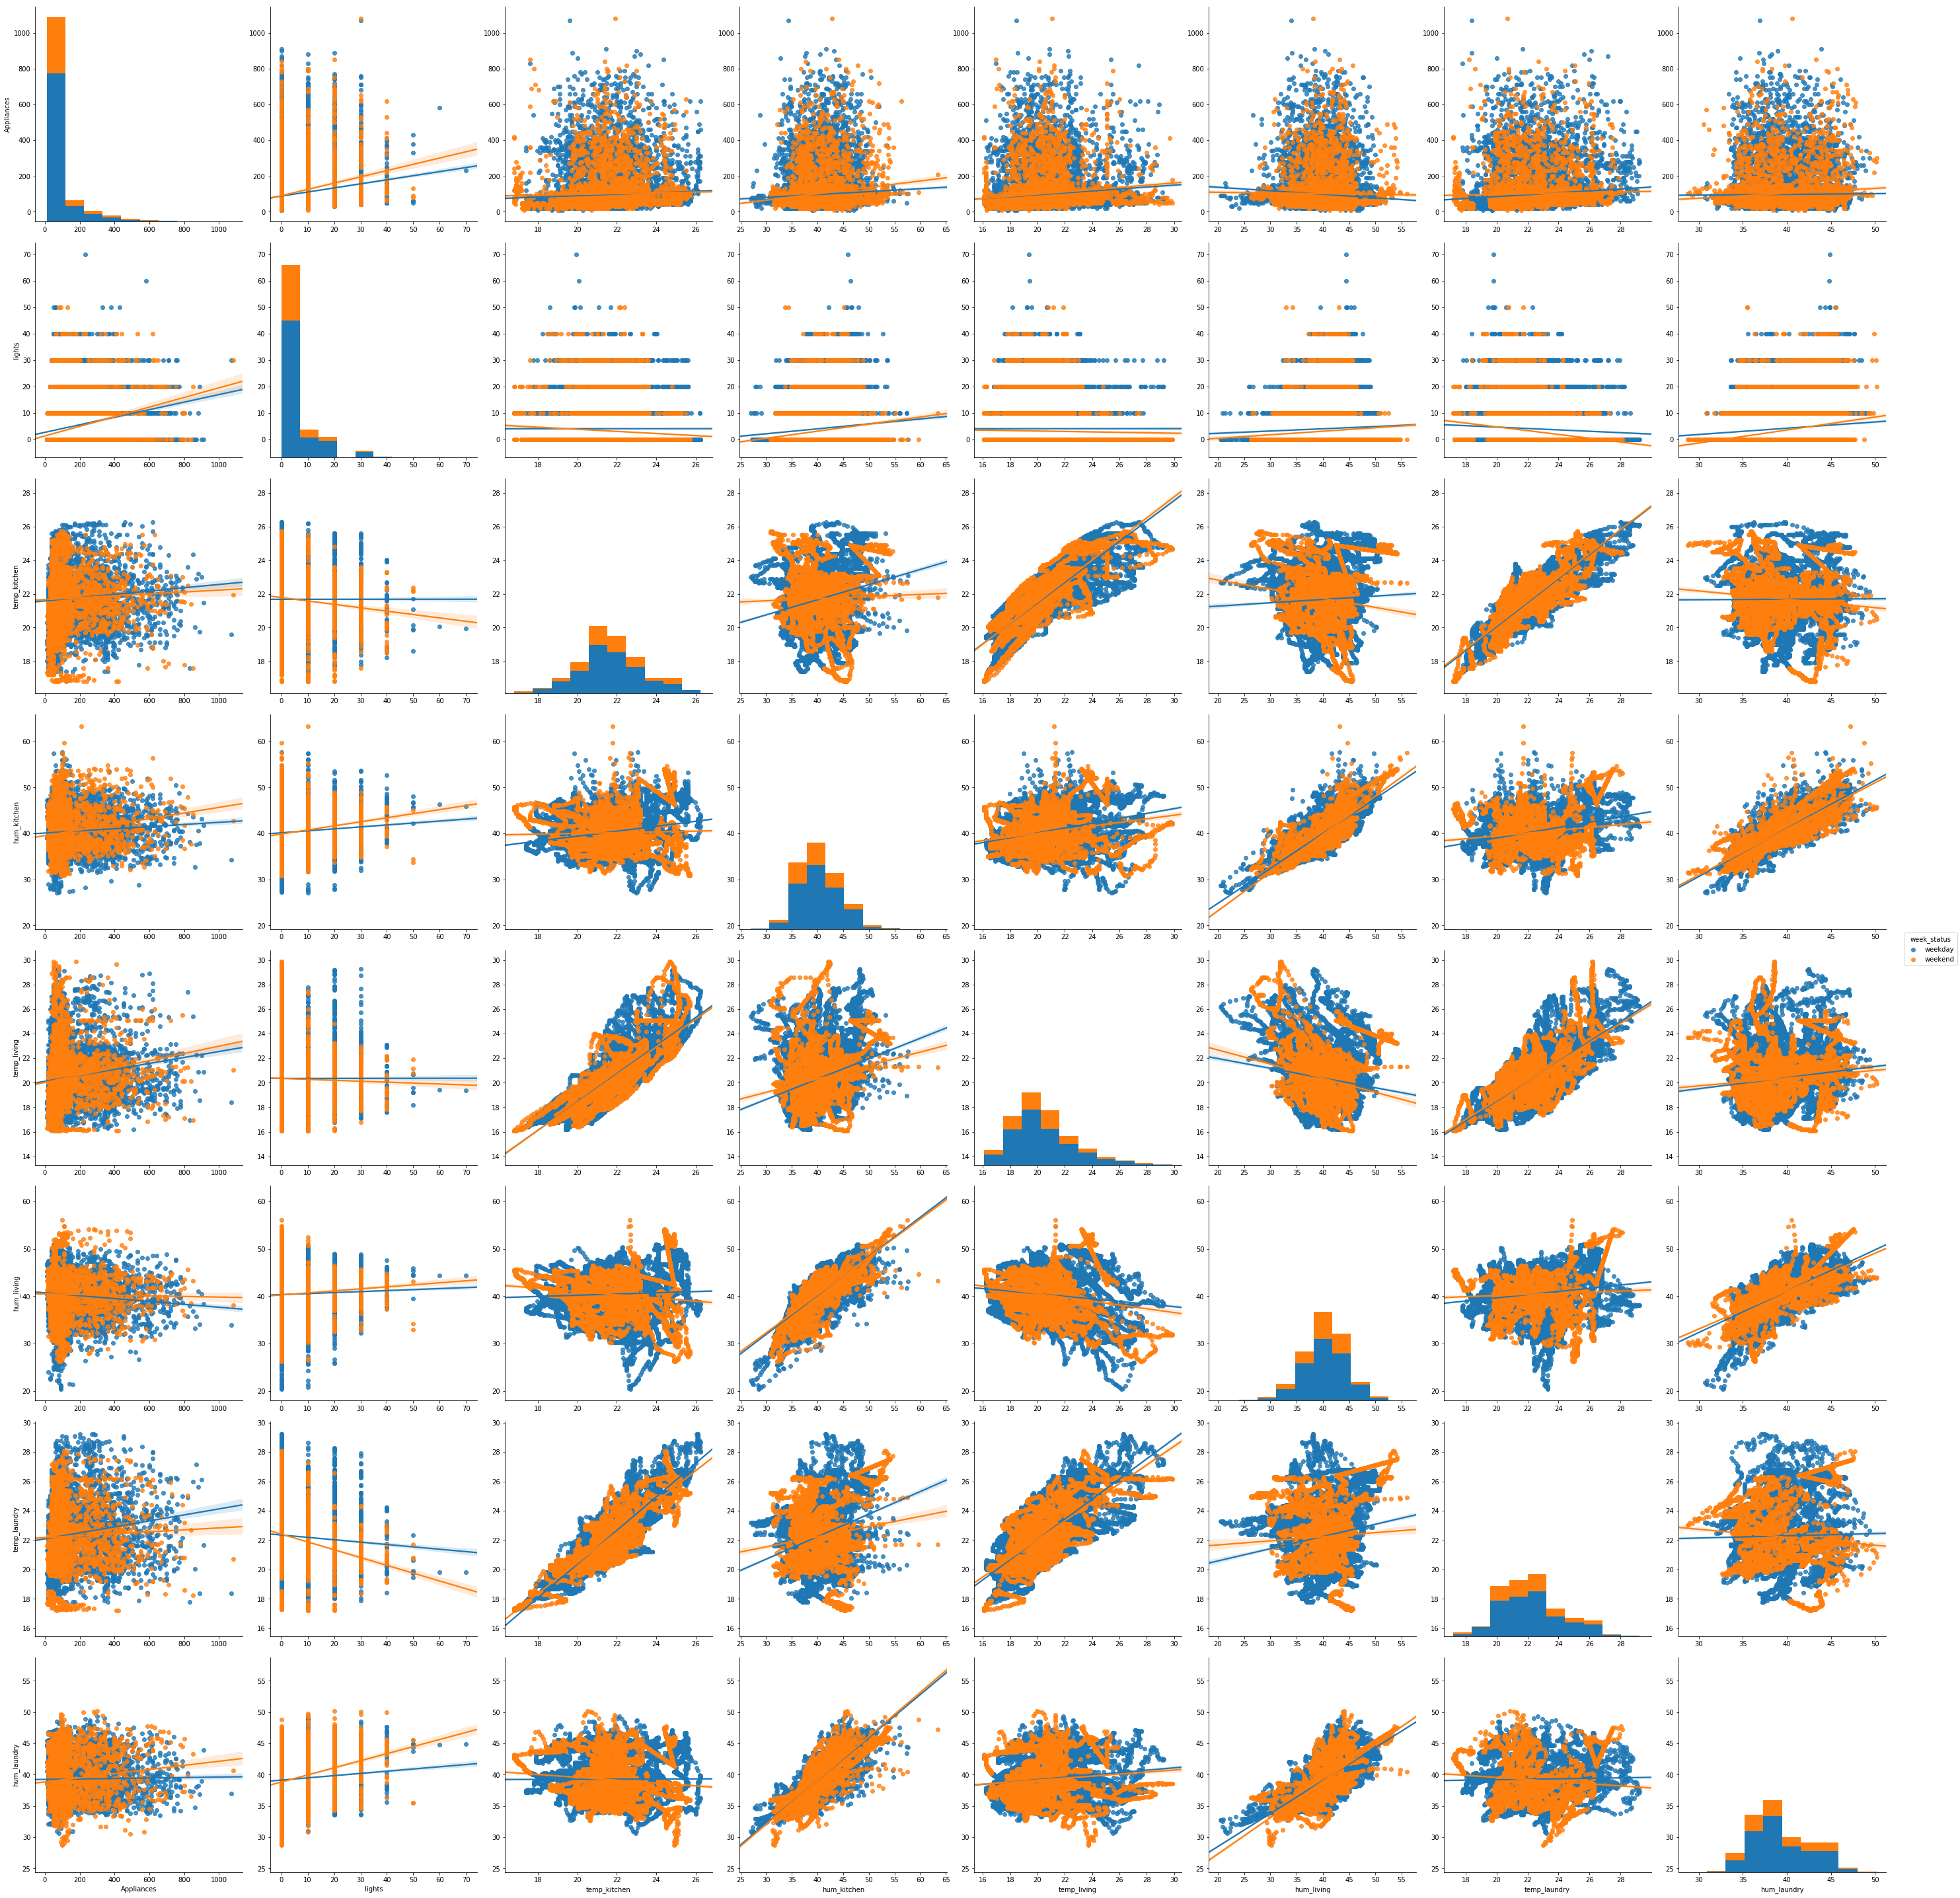

In [57]:
sns.pairplot(df1, hue='week_status', size=5, kind='reg');

In [71]:
sns.pairplot(df2, hue='week_status', size=5, kind='reg');

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


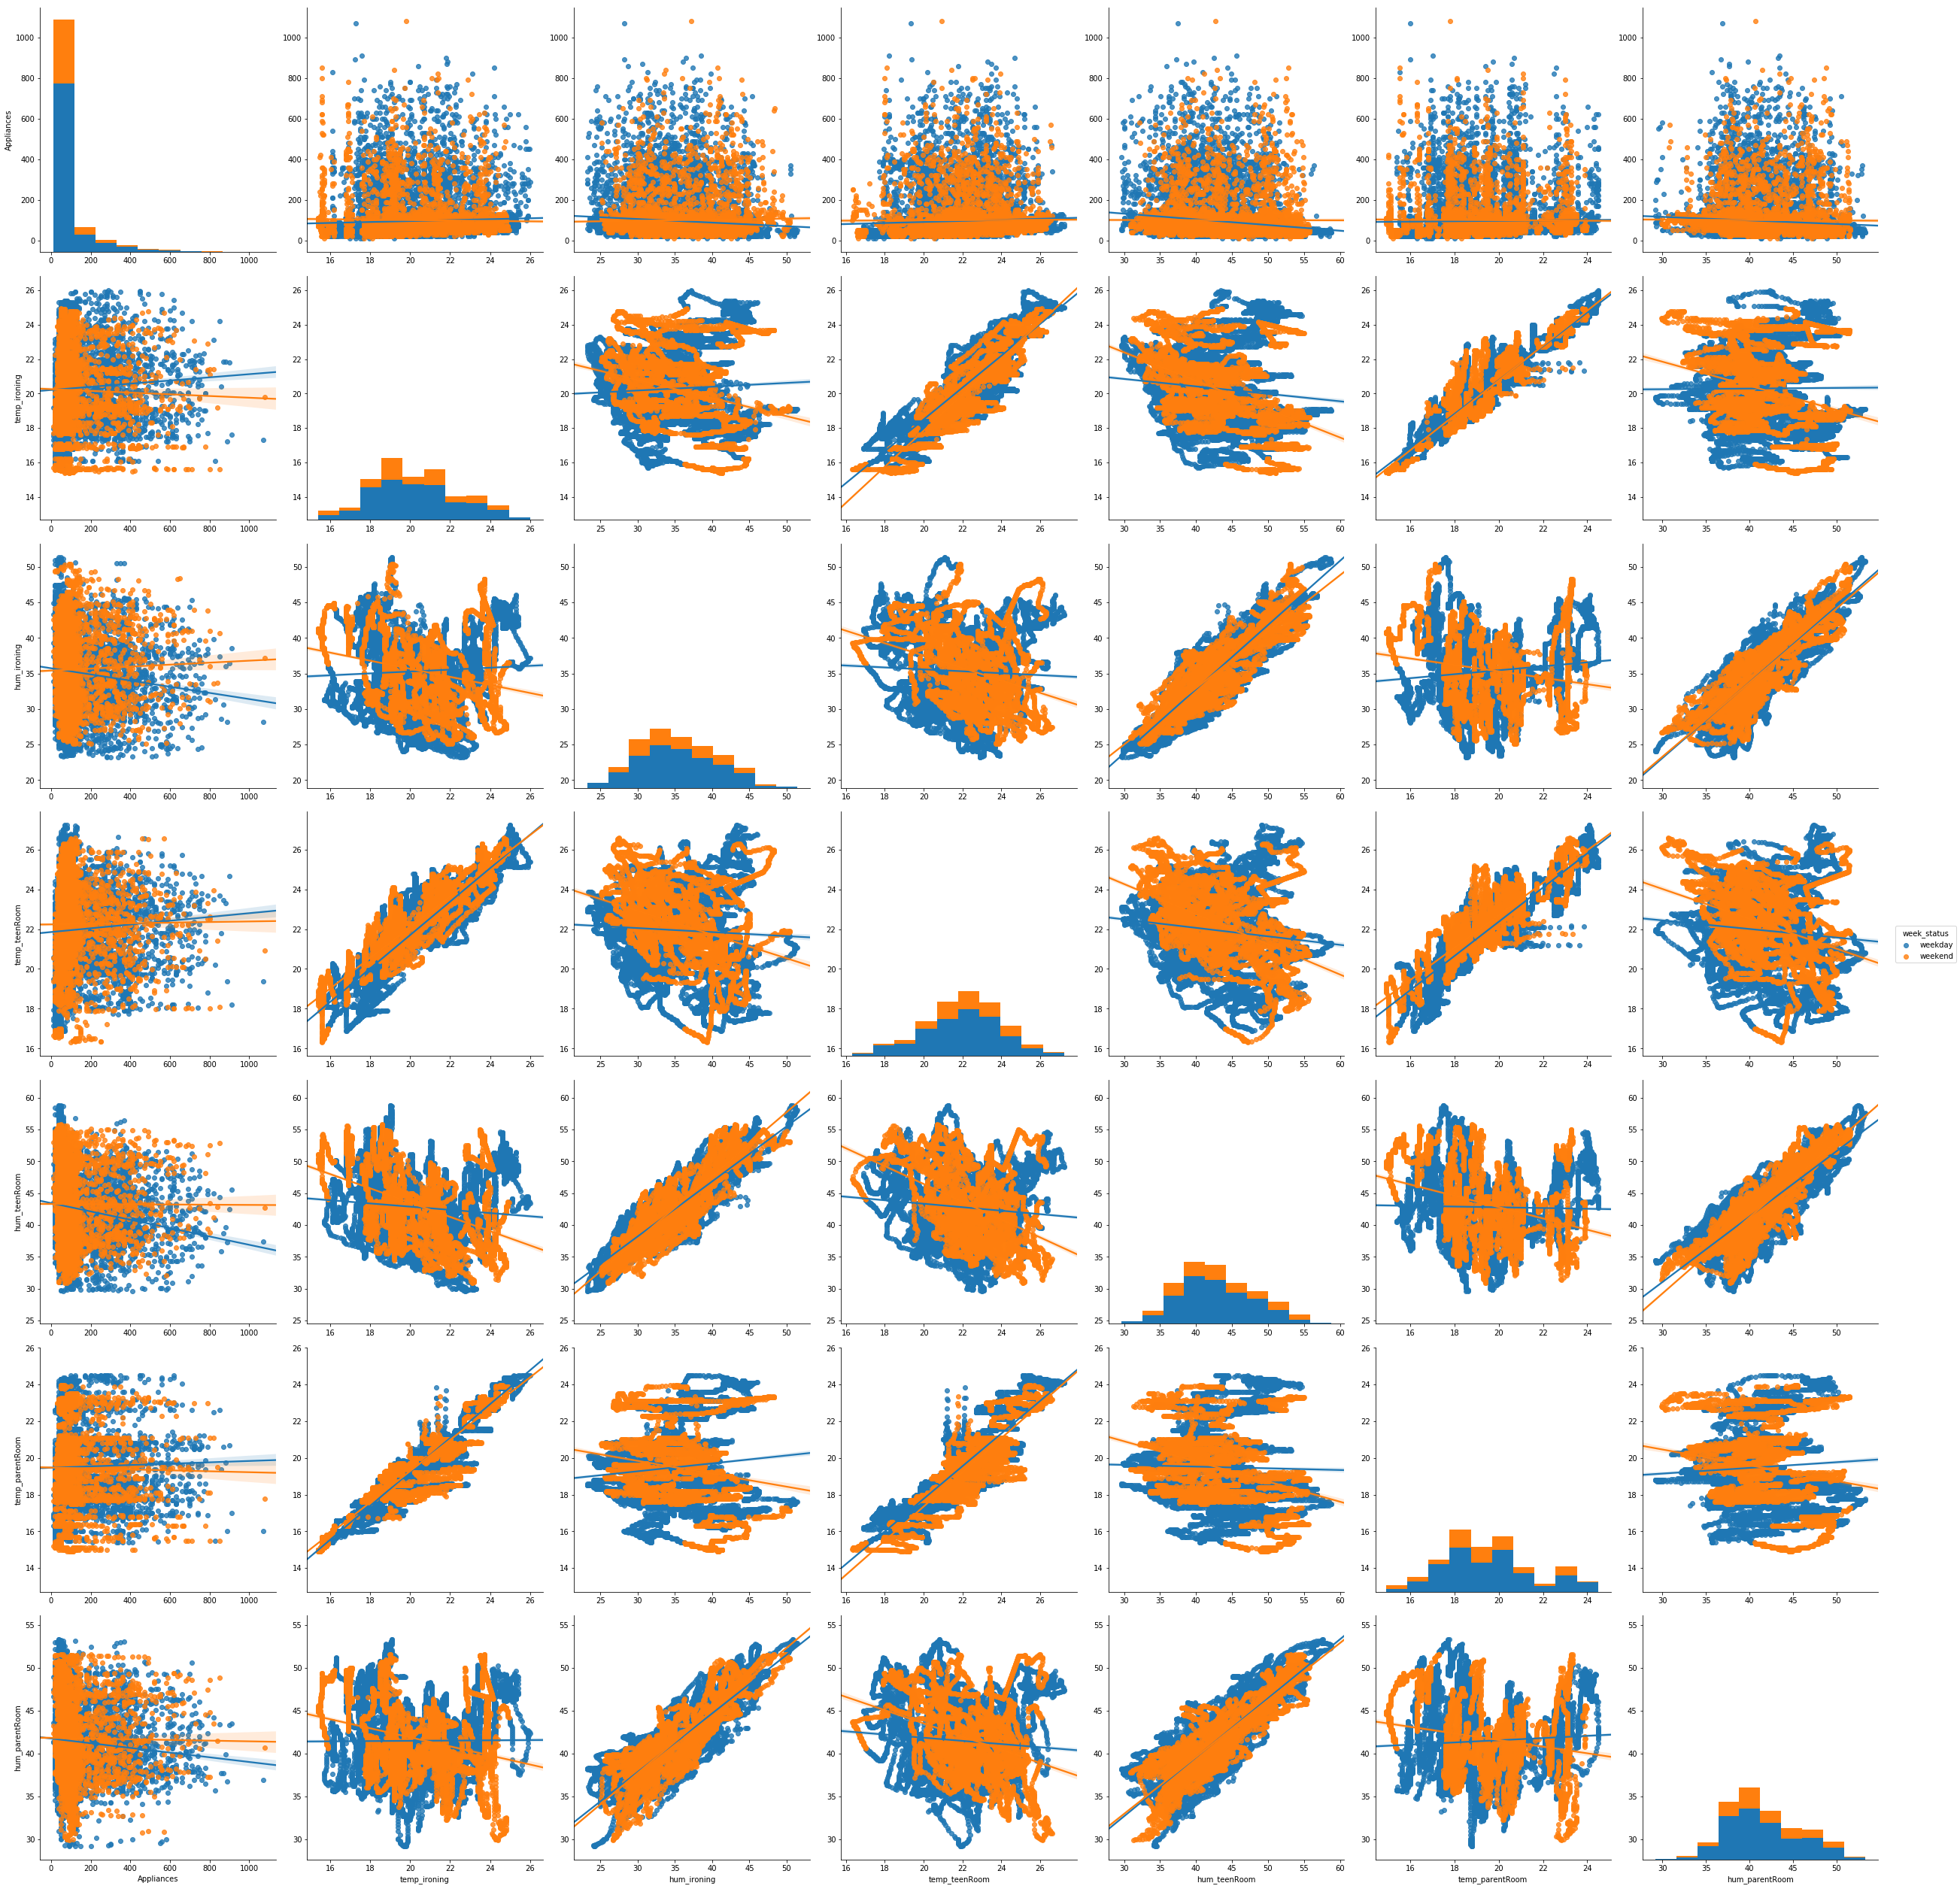

In [59]:
sns.pairplot(df3, hue='week_status', size=5, kind='reg');

In [75]:
sns.pairplot(df4, hue='week_status', size=5, kind='reg');

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [61]:
Data.corr(method='pearson', min_periods=1)

Appliances    lights  temp_kitchen  hum_kitchen  \
Appliances           1.000000  0.197278      0.055447     0.086031   
lights               0.197278  1.000000     -0.023528     0.106968   
temp_kitchen         0.055447 -0.023528      1.000000     0.164006   
hum_kitchen          0.086031  0.106968      0.164006     1.000000   
temp_living          0.120073 -0.005622      0.836834     0.269839   
hum_living          -0.060465  0.050985     -0.002509     0.797535   
temp_laundry         0.085060 -0.097393      0.892402     0.253230   
hum_laundry          0.036292  0.131161     -0.028550     0.844677   
temp_office          0.040281 -0.008859      0.877001     0.106180   
hum_office           0.016965  0.114936      0.097861     0.880359   
temp_bathroom        0.019760 -0.078745      0.885247     0.205797   
hum_bathroom         0.006955  0.141233     -0.014782     0.303258   
temp_building_out    0.117638 -0.079029      0.654769     0.316141   
hum_building_out    -0.083178  0.153756     -0.615045     0.245126   
temp_ironing         0.025801 -0.135347      0.838705     0.021397   
hum_ironing         -0.055642  0.035069      0.135182     0.801122   
temp_teenRoom        0.039572 -0.071458      0.825413    -0.030053   
hum_teenRoom        -0.094039  0.012915     -0.006441     0.736196   
temp_parentRoom      0.010010 -0.157592      0.844777     0.115263   
hum_parentRoom      -0.051462 -0.008766      0.071756     0.764001   
temp_out             0.099155 -0.074424      0.682846     0.340767   
Pressure            -0.034885 -0.010576     -0.150574    -0.293957   
hum_out             -0.152282  0.068543     -0.345481     0.274126   
Windspeed            0.087122  0.060281     -0.087654     0.204932   
Visibility           0.000230  0.020038     -0.076210    -0.021057   
Tdewpoint            0.015353 -0.036322      0.571309     0.639106   
rv1                 -0.011145  0.000521     -0.006203    -0.000699   
rv2                 -0.011145  0.000521     -0.006203    -0.000699   
Num_sec_midnight     0.217152  0.254993      0.178728     0.018531   

                   temp_living  hum_living  temp_laundry  hum_laundry  \
Appliances            0.120073   -0.060465      0.085060     0.036292   
lights               -0.005622    0.050985     -0.097393     0.131161   
temp_kitchen          0.836834   -0.002509      0.892402    -0.028550   
hum_kitchen           0.269839    0.797535      0.253230     0.844677   
temp_living           1.000000   -0.165610      0.735245     0.121497   
hum_living           -0.165610    1.000000      0.137319     0.678326   
temp_laundry          0.735245    0.137319      1.000000    -0.011234   
hum_laundry           0.121497    0.678326     -0.011234     1.000000   
temp_office           0.762066   -0.047304      0.852778    -0.140457   
hum_office            0.231563    0.721435      0.122737     0.898978   
temp_bathroom         0.720550    0.110409      0.888169    -0.050062   
hum_bathroom          0.029595    0.250271     -0.066355     0.375422   
temp_building_out     0.801186   -0.009670      0.686882     0.076833   
hum_building_out     -0.580372    0.389933     -0.647672     0.514912   
temp_ironing          0.663660   -0.051422      0.847374    -0.250090   
hum_ironing           0.229212    0.690584      0.172624     0.832685   
temp_teenRoom         0.578191   -0.041023      0.795283    -0.283228   
hum_teenRoom          0.068534    0.679777      0.044427     0.828822   
temp_parentRoom       0.675535    0.054544      0.901324    -0.195270   
hum_parentRoom        0.157346    0.676467      0.134602     0.833538   
temp_out              0.792255    0.033674      0.699417     0.118207   
Pressure             -0.133028   -0.255646     -0.189974    -0.233274   
hum_out              -0.505291    0.584911     -0.281718     0.356192   
Windspeed             0.052495    0.069190     -0.100776     0.263188   
Visibility           -0.069721   -0.005368     -0.102310     0.017041   
Tdewpoint           

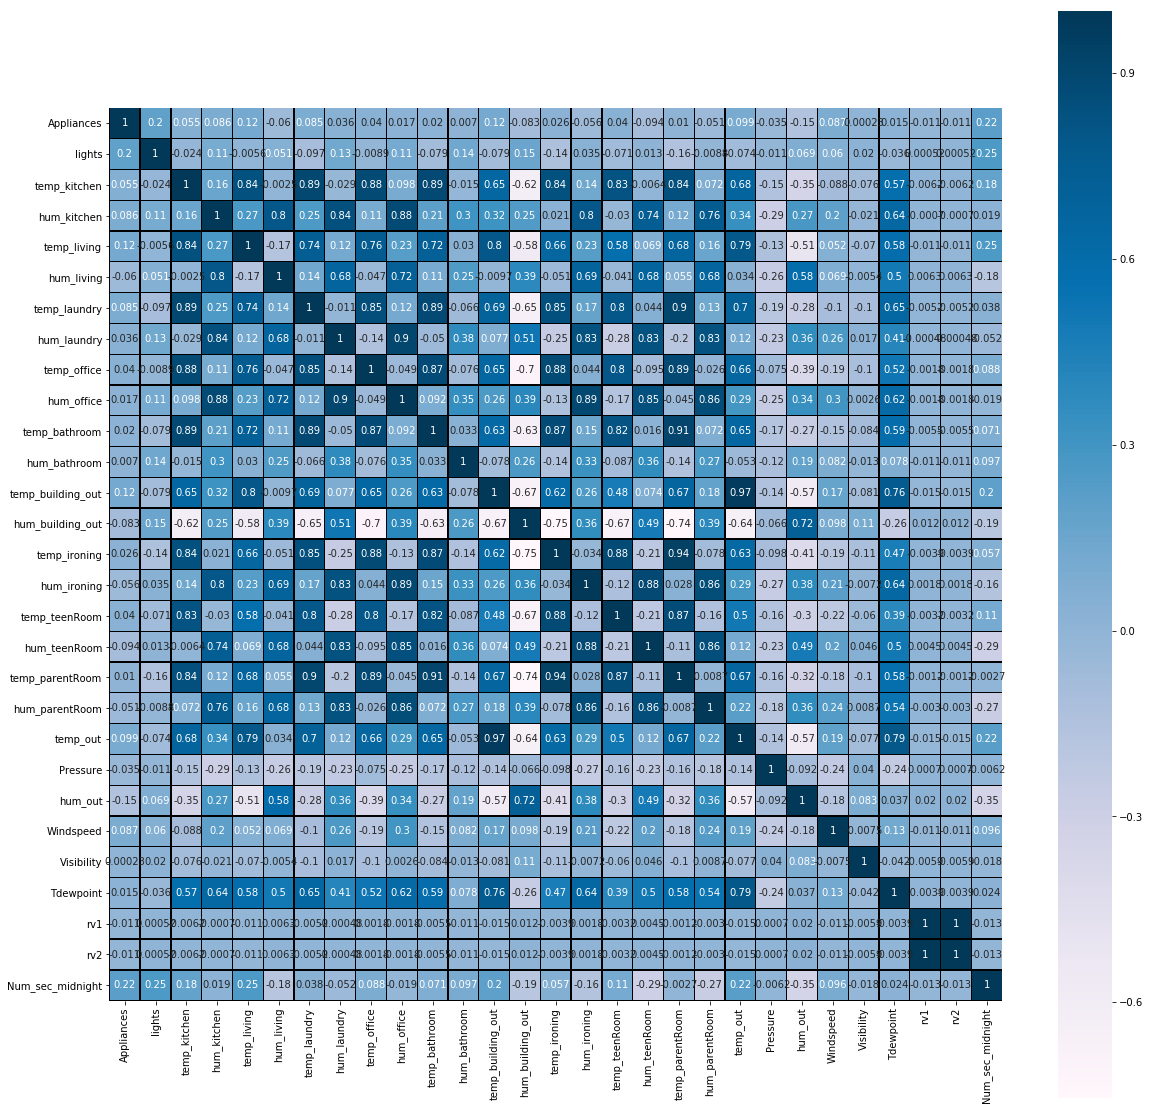

In [65]:
corr_mat=Data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='PuBu', linecolor='black', linewidths=0.25)

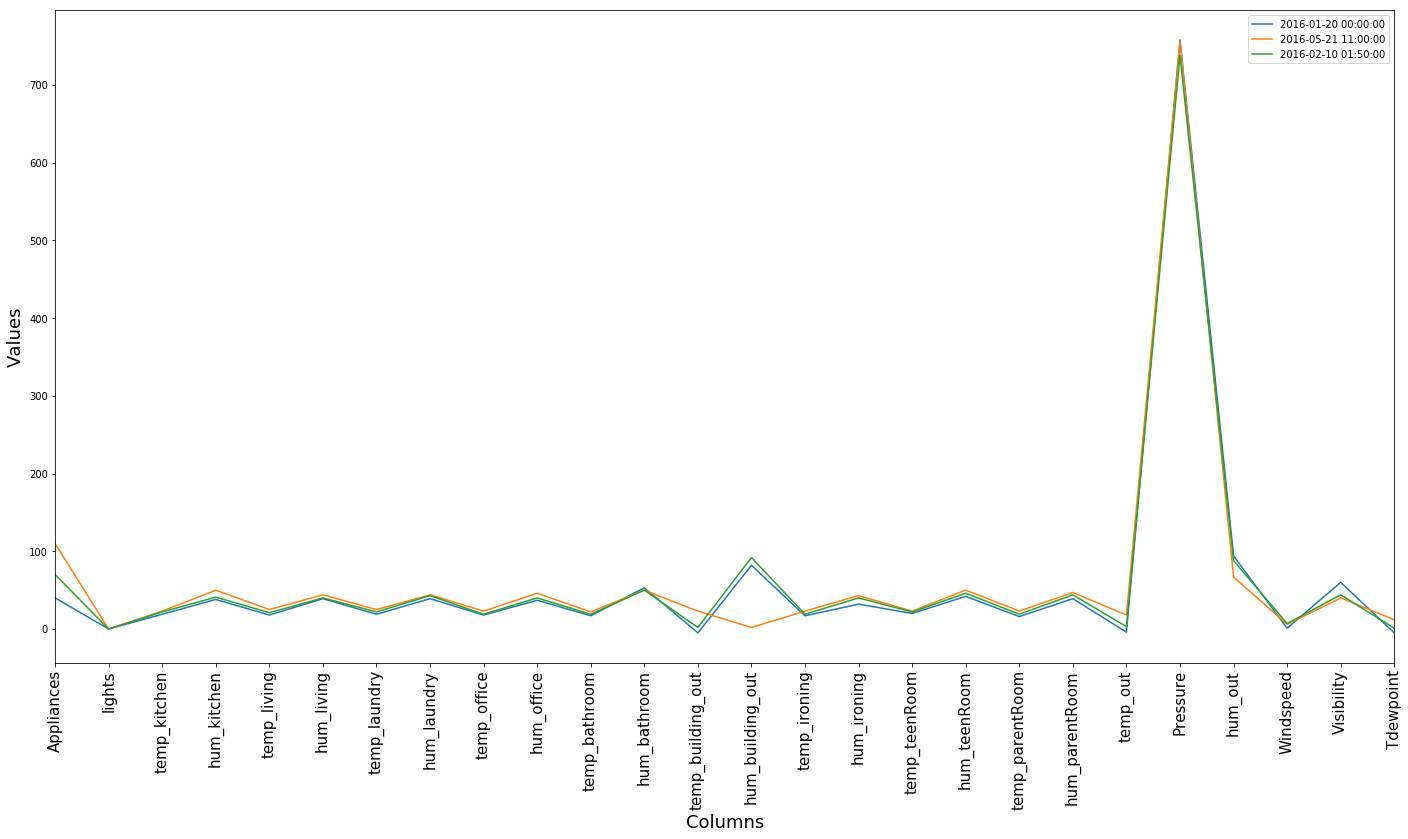

In [72]:
def plotDatetimeWise(datetime):
    fig, ax = plt.subplots()
    count = 1
    for time in datetime:
        newdf = Data[Data.columns[0:26]]
        df_player = newdf.loc[time]
        df_player = df_player.astype('int')
        df_player.T.plot.line(figsize = (24,12),ax=ax)
        ax.legend()
        ax.set_xlabel('Columns',fontsize=18)
        ax.set_ylabel('Values',fontsize=18)
        ax.set_xticks(np.arange(len(newdf.columns)))
        ax.set_xticklabels(labels = newdf.columns, rotation=90,fontsize=15)
        count = count + 1
plotDatetimeWise(['2016-01-20 00:00:00', '2016-05-21 11:00:00', '2016-02-10 01:50:00'])

In [68]:
Data.to_csv('modifiedData.csv')